In [24]:
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np
import random 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import binary_crossentropy
from sklearn.metrics import confusion_matrix
import itertools
import shutil
import glob
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train_path = "/content/drive/My Drive/Data/train/"
valid_path = "/content/drive/My Drive/Data/valid/"
test_path = "/content/drive/My Drive/Data/test/"

In [4]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=train_path, target_size = (224,224), batch_size = 10, classes=["Closed","Open"])
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=valid_path, target_size = (224,224), batch_size = 10, classes=["Closed","Open"])
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=test_path, target_size = (224,224), batch_size = 10,classes=["Closed","Open"], shuffle=False)


Found 842 images belonging to 2 classes.
Found 392 images belonging to 2 classes.
Found 218 images belonging to 2 classes.


In [5]:
imgs, labels=next(train_batches)

In [6]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis("off")
    plt.tight_layout()
    plt.show()

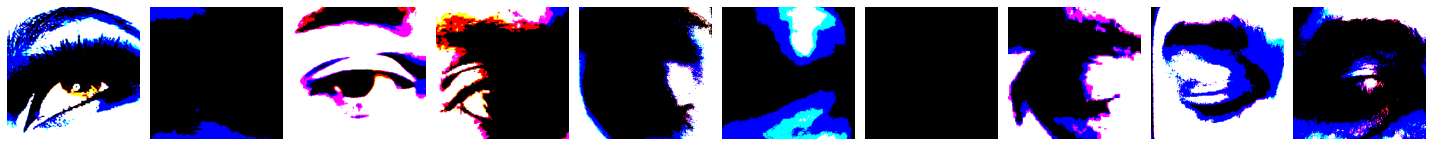

[[0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


(10, 224, 224, 3)

In [9]:
plotImages(imgs)
print(labels)
imgs.shape

In [ ]:
test_batches.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int32)

## **Fine-tuned VGG16 Model**

In [7]:
vgg16_model = tf.keras.applications.vgg16.VGG16()

553476096/553467096 [==============================] - 4s 0us/step


In [8]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [13]:
from tensorflow.keras.applications import vgg16

In [15]:
vgg16_model= vgg16.VGG16(
    
    include_top=False,
    weights="imagenet",
    input_shape=(224,244,3),
    classes=2
)

In [16]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 244, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 244, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 244, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 122, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 122, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 122, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 61, 128)       0     

##**Agregando capas**

In [17]:
model = Sequential()

for layer in vgg16_model.layers:
  layer.trainable = False
  model.add(layer)

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 244, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 244, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 122, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 122, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 122, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 61, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 61, 256)       2

In [22]:
model.add(Flatten())
model.add(Dense(units=512, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(units=2, activation="softmax"))

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 244, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 244, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 122, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 122, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 122, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 61, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 61, 256)       2

## **Training the fine-tuned VGG16 model**

In [25]:
model.compile(optimizer = Adam(learning_rate=0.0001), loss="binary_crossentropy", metrics=["accuracy"])

In [27]:
model.fit(x=train_batches, validation_data=valid_batches, epochs=10, verbose=2)

Epoch 1/10
85/85 - 675s - loss: 0.1891 - accuracy: 0.9798 - val_loss: 0.0740 - val_accuracy: 0.9898 - 675s/epoch - 8s/step
Epoch 2/10
85/85 - 658s - loss: 0.0205 - accuracy: 0.9964 - val_loss: 0.0307 - val_accuracy: 0.9923 - 658s/epoch - 8s/step
Epoch 3/10
85/85 - 714s - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0920 - val_accuracy: 0.9949 - 714s/epoch - 8s/step
Epoch 4/10
85/85 - 658s - loss: 0.0088 - accuracy: 1.0000 - val_loss: 0.1692 - val_accuracy: 0.9847 - 658s/epoch - 8s/step
Epoch 5/10
85/85 - 656s - loss: 1.6813e-04 - accuracy: 1.0000 - val_loss: 0.1046 - val_accuracy: 0.9872 - 656s/epoch - 8s/step
Epoch 6/10
85/85 - 667s - loss: 3.8051e-04 - accuracy: 1.0000 - val_loss: 0.0953 - val_accuracy: 0.9847 - 667s/epoch - 8s/step
Epoch 7/10
85/85 - 658s - loss: 5.0534e-04 - accuracy: 1.0000 - val_loss: 0.1311 - val_accuracy: 0.9847 - 658s/epoch - 8s/step
Epoch 8/10
85/85 - 656s - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.1023 - val_accuracy: 0.9847 - 656s/epoch - 8s/step
Epoc

In [35]:
predictions = model.predict(x=test_batches, verbose = 1)

22/22 [==============================] - 116s 5s/step


In [37]:
cm = confusion_matrix(y_true= test_batches.classes, y_pred=np.argmax(predictions,axis=-1))

In [38]:
test_batches.class_indices

{'Closed': 0, 'Open': 1}

In [39]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#*Con epochs igual a 5*

Confusion matrix, without normalization
[[107   2]
 [  5 104]]


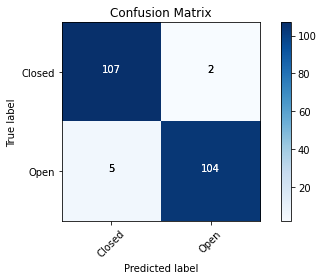

In [ ]:
cm_plot_labels=["Closed", "Open"]
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title="Confusion Matrix" )

#*Con epochs igual a 6, val_accuracy = 0,9821*




In [ ]:
cm = confusion_matrix(y_true= test_batches.classes, y_pred=np.argmax(predictions,axis=-1))

Confusion matrix, without normalization
[[108   1]
 [  5 104]]


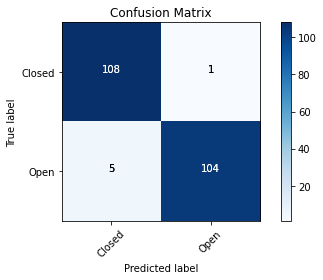

In [ ]:
cm_plot_labels=["Closed", "Open"]
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title="Confusion Matrix" )

#*Con epochs igual a 7, val_accuracy =0.9847*

In [ ]:
cm = confusion_matrix(y_true= test_batches.classes, y_pred=np.argmax(predictions,axis=-1))

Confusion matrix, without normalization
[[108   1]
 [  5 104]]


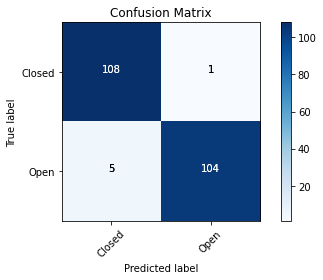

In [ ]:
cm_plot_labels=["Closed", "Open"]
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title="Confusion Matrix" )

In [40]:
cm = confusion_matrix(y_true= test_batches.classes, y_pred=np.argmax(predictions,axis=-1))

##**Fine-tuning con 4 capas**

Confusion matrix, without normalization
[[108   1]
 [  2 107]]


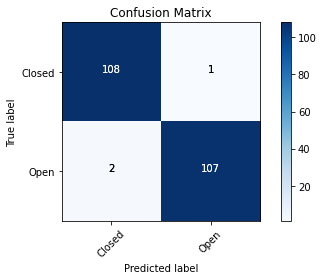

In [41]:
cm_plot_labels=["Closed", "Open"]
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title="Confusion Matrix" )